<a href="https://colab.research.google.com/github/TMhdSofyan/Prediction-Flow-Zone-Indicator-/blob/main/Unsupervised_LoggingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.4 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=d8e67eeec5985401c3d6904427b6aae48924f25606a8b256e4b1ece408998932
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built jcopml


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [5]:
df = pd.read_csv('/content/drive/MyDrive/01_Project_Reservoir_Description/Data/gamma_interp.csv')
df.head()

,LOGFZI,FZI,CGR,DRHO,DT5,GR,HNPO,LLD,LLHR,LLS,MRES,MSFC,NPHI,NPOR,POTA,RHOB,SP,THOR,URAN
0,2.324533,211.121914,31.992576,0.034071,86.073454,47.128474,0.184824,1.484896,1.989065,1.370871,0.067983,1.299775,0.179966,0.179166,1.292815,2.376139,4.092643,2.646898,2.012321
1,2.460043,288.431455,31.976041,0.025724,86.340619,48.285009,0.183564,1.479856,1.984340,1.344729,0.067904,1.278673,0.184376,0.181292,1.281476,2.365824,3.945005,2.688867,1.995077
2,2.438689,274.592462,36.236242,0.009850,87.020905,50.670716,0.181900,1.491390,1.827785,1.336755,0.067821,1.246173,0.187421,0.179666,1.476265,2.335299,4.080146,2.949177,1.992421
3,2.697101,497.852972,42.122592,0.003631,87.951610,53.894521,0.173462,1.559632,1.893686,1.371531,0.067900,1.095846,0.185625,0.182018,1.743465,2.322451,4.771490,3.316663,1.904021
4,2.265888,184.453837,42.361279,0.014313,88.442537,54.477657,0.188333,1.590263,2.136641,1.372559,0.067900,1.328147,0.184468,0.185889,1.781504,2.329119,4.248235,3.220796,1.711496


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

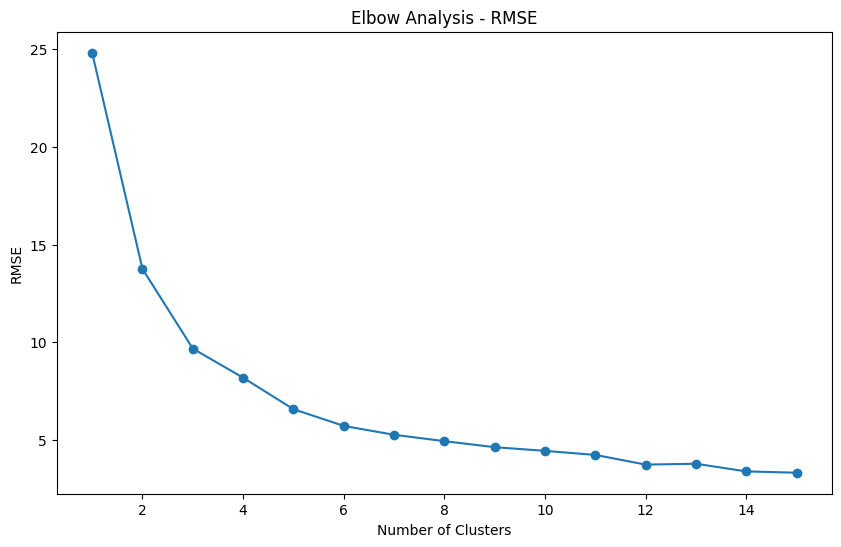

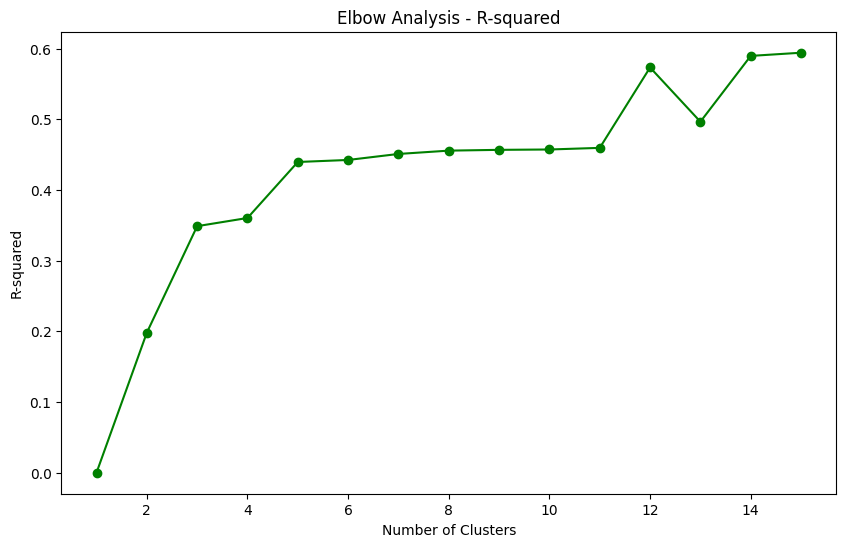

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score


# Extract all columns as features for clustering
X = df.copy()

# Specify the maximum number of clusters to evaluate
max_clusters = 15

# Initialize lists to store the results
num_clusters_list = []
rmse_list = []
r2_list = []

# Perform K-Means clustering for different number of clusters
for num_clusters in range(1, max_clusters + 1):
    # Initialize K-Means clustering algorithm
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Perform clustering
    kmeans.fit(X)
    
    # Calculate the centroid for each sample
    centroids = kmeans.cluster_centers_[kmeans.labels_]
    
    # Calculate the RMSE
    rmse_value = mean_squared_error(X, centroids, squared=False)
    
    # Calculate the R-squared
    r2_value = r2_score(X, centroids)
    
    # Append number of clusters, RMSE, and R-squared to the lists
    num_clusters_list.append(num_clusters)
    rmse_list.append(rmse_value)
    r2_list.append(r2_value)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Number of Clusters': num_clusters_list,
    'RMSE': rmse_list,
    'R-squared': r2_list
})

# Plot the RMSE values against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(results_df['Number of Clusters'], results_df['RMSE'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('RMSE')
plt.title('Elbow Analysis - RMSE')
plt.show()

# Plot the R-squared values against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(results_df['Number of Clusters'], results_df['R-squared'], marker='o', color='green')
plt.xlabel('Number of Clusters')
plt.ylabel('R-squared')
plt.title('Elbow Analysis - R-squared')
plt.show()


In [13]:
results_df

,Number of Clusters,RMSE,R-squared
0,1,24.799760,-5.258951e-17
1,2,13.754604,1.981430e-01
2,3,9.683397,3.488258e-01
3,4,8.195441,3.604096e-01
4,5,6.585967,4.396358e-01
5,6,5.732037,4.424981e-01
6,7,5.278156,4.510011e-01
7,8,4.952710,4.557016e-01
8,9,4.644395,4.568080e-01
9,10,4.456462,4.573114e-01


In [16]:
import pandas as pd
from sklearn.cluster import KMeans

# Remove any unwanted columns
X = df.copy()

# Specify the number of clusters
num_clusters = 11

# Initialize K-Means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Perform clustering
kmeans.fit(X)

# Get the cluster labels for each sample
cluster_labels = kmeans.labels_

# Assign cluster names based on the provided dictionary
cluster_names = {
    0: 'HFU 1',
    1: 'HFU 2',
    2: 'HFU 3',
    3: 'HFU 4',
    4: 'HFU 5',
    5: 'HFU 6',
    6: 'HFU 7',
    7: 'HFU 8',
    8: 'HFU 9',
    9: 'HFU 10',
    10: 'HFU 11'
}

# Map cluster labels to cluster names
cluster_labels = [cluster_names[label] for label in cluster_labels]

# Add the cluster labels to the DataFrame
X['Cluster'] = cluster_labels

# Print the count of samples in each cluster
print(X['Cluster'].value_counts())

HFU 3     63
HFU 9     25
HFU 2     24
HFU 7     22
HFU 10    19
HFU 5     16
HFU 1     12
HFU 8     11
HFU 6     11
HFU 4      6
HFU 11     3
Name: Cluster, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
X = X.sort_values('Cluster')
X.head()

,LOGFZI,FZI,CGR,DRHO,DT5,GR,HNPO,LLD,LLHR,LLS,MRES,MSFC,NPHI,NPOR,POTA,RHOB,SP,THOR,URAN,Cluster
186,2.941435,873.846020,33.638988,0.029349,75.775969,40.482406,0.125607,1.543134,1.671602,1.323103,0.0665,1.300437,0.102113,0.113974,1.369989,2.433645,1.530144,2.739564,0.938038,HFU 1
17,2.959865,911.728012,25.941020,0.011706,81.891525,30.385351,0.149656,1.125444,1.350033,0.969271,0.0679,1.033579,0.161980,0.162376,0.988262,2.329371,4.688156,2.390600,0.431530,HFU 1
149,2.938257,867.475486,25.989290,0.012370,76.906615,30.154308,0.124865,1.257988,1.542456,0.987061,0.0667,1.082059,0.122718,0.127264,0.936929,2.371889,1.331693,2.611750,0.378642,HFU 1
29,2.950896,893.091256,14.880486,0.044977,77.179857,35.156092,0.093056,1.544091,1.838159,1.468328,0.0676,1.541751,0.092794,0.094977,0.186907,2.464286,3.804462,2.919371,1.877116,HFU 1
18,2.934998,860.988852,26.471984,0.012415,81.568080,29.794799,0.155915,1.152905,1.342474,0.999743,0.0679,1.031217,0.159676,0.159659,1.017730,2.337403,4.761975,2.401880,0.423616,HFU 1


#**Clustering Without FZI and LOGFZI DATA**#

In [61]:
y = df.copy()

In [62]:
y.drop(columns=['LOGFZI', 'FZI'], inplace=True)

In [63]:
y.head()

,CGR,DRHO,DT5,GR,HNPO,LLD,LLHR,LLS,MRES,MSFC,NPHI,NPOR,POTA,RHOB,SP,THOR,URAN
0,31.992576,0.034071,86.073454,47.128474,0.184824,1.484896,1.989065,1.370871,0.067983,1.299775,0.179966,0.179166,1.292815,2.376139,4.092643,2.646898,2.012321
1,31.976041,0.025724,86.340619,48.285009,0.183564,1.479856,1.984340,1.344729,0.067904,1.278673,0.184376,0.181292,1.281476,2.365824,3.945005,2.688867,1.995077
2,36.236242,0.009850,87.020905,50.670716,0.181900,1.491390,1.827785,1.336755,0.067821,1.246173,0.187421,0.179666,1.476265,2.335299,4.080146,2.949177,1.992421
3,42.122592,0.003631,87.951610,53.894521,0.173462,1.559632,1.893686,1.371531,0.067900,1.095846,0.185625,0.182018,1.743465,2.322451,4.771490,3.316663,1.904021
4,42.361279,0.014313,88.442537,54.477657,0.188333,1.590263,2.136641,1.372559,0.067900,1.328147,0.184468,0.185889,1.781504,2.329119,4.248235,3.220796,1.711496


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

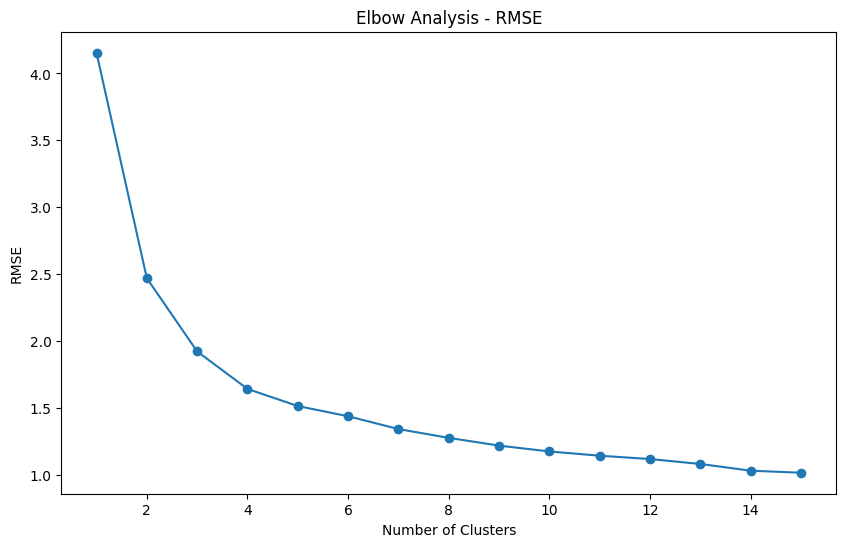

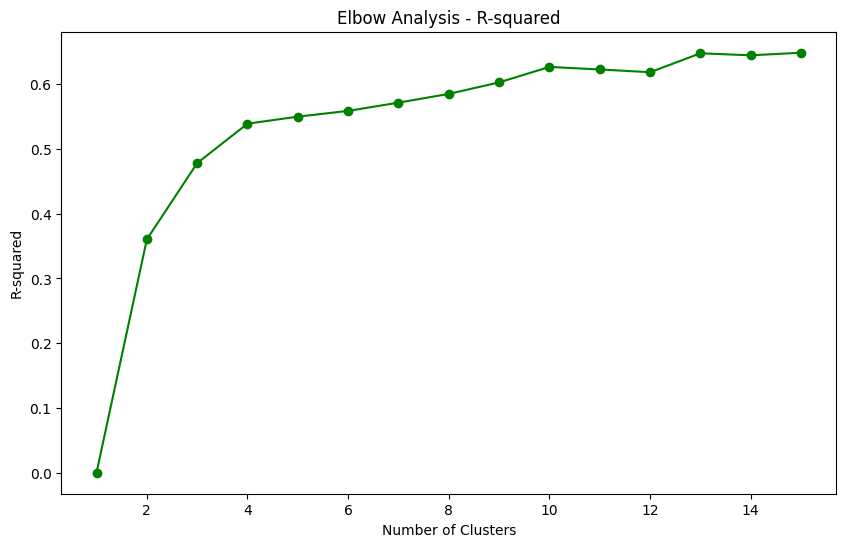

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score


# Extract all columns as features for clustering
y = y.copy()

# Specify the maximum number of clusters to evaluate
max_clusters = 15

# Initialize lists to store the results
num_clusters_list = []
rmse_list = []
r2_list = []

# Perform K-Means clustering for different number of clusters
for num_clusters in range(1, max_clusters + 1):
    # Initialize K-Means clustering algorithm
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Perform clustering
    kmeans.fit(y)
    
    # Calculate the centroid for each sample
    centroids = kmeans.cluster_centers_[kmeans.labels_]
    
    # Calculate the RMSE
    rmse_value = mean_squared_error(y, centroids, squared=False)
    
    # Calculate the R-squared
    r2_value = r2_score(y, centroids)
    
    # Append number of clusters, RMSE, and R-squared to the lists
    num_clusters_list.append(num_clusters)
    rmse_list.append(rmse_value)
    r2_list.append(r2_value)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Number of Clusters': num_clusters_list,
    'RMSE': rmse_list,
    'R-squared': r2_list
})

# Plot the RMSE values against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(results_df['Number of Clusters'], results_df['RMSE'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('RMSE')
plt.title('Elbow Analysis - RMSE')
plt.show()

# Plot the R-squared values against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(results_df['Number of Clusters'], results_df['R-squared'], marker='o', color='green')
plt.xlabel('Number of Clusters')
plt.ylabel('R-squared')
plt.title('Elbow Analysis - R-squared')
plt.show()


In [64]:
import pandas as pd
from sklearn.cluster import KMeans

# Remove any unwanted columns
y = y.copy()

# Specify the number of clusters
num_clusters = 10

# Initialize K-Means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Perform clustering
kmeans.fit(y)

# Get the cluster labels for each sample
cluster_labels = kmeans.labels_

# Assign cluster names based on the provided dictionary
cluster_names = {
    0: 'HFU 1',
    1: 'HFU 2',
    2: 'HFU 3',
    3: 'HFU 4',
    4: 'HFU 5',
    5: 'HFU 6',
    6: 'HFU 7',
    7: 'HFU 8',
    8: 'HFU 9',
    9: 'HFU 10'
}

# Map cluster labels to cluster names
cluster_labels = [cluster_names[label] for label in cluster_labels]

# Add the cluster labels to the DataFrame
y['Cluster'] = cluster_labels

# Print the count of samples in each cluster
print(y['Cluster'].value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


HFU 1     53
HFU 6     47
HFU 4     43
HFU 7     17
HFU 9     16
HFU 3      9
HFU 5      9
HFU 10     9
HFU 8      5
HFU 2      4
Name: Cluster, dtype: int64


In [65]:
y = pd.concat([y, df[['LOGFZI', 'FZI']]], axis=1)

In [66]:
y.head()

,CGR,DRHO,DT5,GR,HNPO,LLD,LLHR,LLS,MRES,MSFC,NPHI,NPOR,POTA,RHOB,SP,THOR,URAN,Cluster,LOGFZI,FZI
0,31.992576,0.034071,86.073454,47.128474,0.184824,1.484896,1.989065,1.370871,0.067983,1.299775,0.179966,0.179166,1.292815,2.376139,4.092643,2.646898,2.012321,HFU 4,2.324533,211.121914
1,31.976041,0.025724,86.340619,48.285009,0.183564,1.479856,1.984340,1.344729,0.067904,1.278673,0.184376,0.181292,1.281476,2.365824,3.945005,2.688867,1.995077,HFU 4,2.460043,288.431455
2,36.236242,0.009850,87.020905,50.670716,0.181900,1.491390,1.827785,1.336755,0.067821,1.246173,0.187421,0.179666,1.476265,2.335299,4.080146,2.949177,1.992421,HFU 4,2.438689,274.592462
3,42.122592,0.003631,87.951610,53.894521,0.173462,1.559632,1.893686,1.371531,0.067900,1.095846,0.185625,0.182018,1.743465,2.322451,4.771490,3.316663,1.904021,HFU 4,2.697101,497.852972
4,42.361279,0.014313,88.442537,54.477657,0.188333,1.590263,2.136641,1.372559,0.067900,1.328147,0.184468,0.185889,1.781504,2.329119,4.248235,3.220796,1.711496,HFU 4,2.265888,184.453837


In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame containing the 'FZI' and 'LOGFZI' columns
# Assuming 'y' is the DataFrame containing the 'Cluster' column
# Assuming 'cluster_colors' is the list of colors for the clusters

# Create a scatter plot of FZI vs LOGFZI with different colors for each cluster
plt.figure(figsize=(8, 6))

# Iterate over unique clusters and plot the corresponding points
for cluster in y['Cluster'].unique():
    cluster_data = y[y['Cluster'] == cluster]
    plt.scatter(cluster_data['FZI'], cluster_data['LOGFZI'], color=cluster_colors[int(cluster)], label=f'Cluster {cluster}')

plt.title('FZI vs LOGFZI')
plt.xlabel('FZI')
plt.ylabel('LOGFZI')
plt.legend()
plt.show()

ValueError: ignored

<Figure size 800x600 with 0 Axes>

In [73]:
y.columns

Index(['CGR', 'DRHO', 'DT5', 'GR', 'HNPO', 'LLD', 'LLHR', 'LLS', 'MRES',
       'MSFC', 'NPHI', 'NPOR', 'POTA', 'RHOB', 'SP', 'THOR', 'URAN', 'Cluster',
       'LOGFZI', 'FZI'],
      dtype='object')